# **CNN MODEL TO CLASSIFY MNIST DATASET**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

 **Step 1: Load and preprocess the MNIST dataset.**

The MNIST dataset contains 28x28 grayscale images of handwritten digits (0-9)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Reshape the data to add a channel dimension for the CNN (28x28x1 for grayscale images)

In [3]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

Normalize pixel values to the range [0, 1]

In [4]:
X_train /= 255.0
X_test /= 255.0

One-hot encode the labels (0-9) for multi-class classification

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

 **Step 2: Define the CNN model**

In [6]:
model = models.Sequential()

# First convolutional layer with ReLU activation and max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with ReLU activation and max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the feature maps to feed into fully connected layers
model.add(layers.Flatten())

# Fully connected (dense) layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 3: Compile the model**

Use categorical crossentropy as the loss function for multi-class classification.
Use Adam optimizer and track accuracy as the metric

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Step 4: Train the model**

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8387 - loss: 0.5112 - val_accuracy: 0.9831 - val_loss: 0.0596
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9822 - loss: 0.0554 - val_accuracy: 0.9830 - val_loss: 0.0602
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9878 - loss: 0.0368 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9878 - val_loss: 0.0406
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9874 - val_loss: 0.0425
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 0.9870 - val_loss: 0.0445
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9940 - loss: 0.0172 - val_accuracy: 0.9908 - val_loss: 0.0421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.

**Step 5: Evaluate the model on the test set**

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0434
Test Accuracy: 0.9897


**Step 6: Visualize training history**

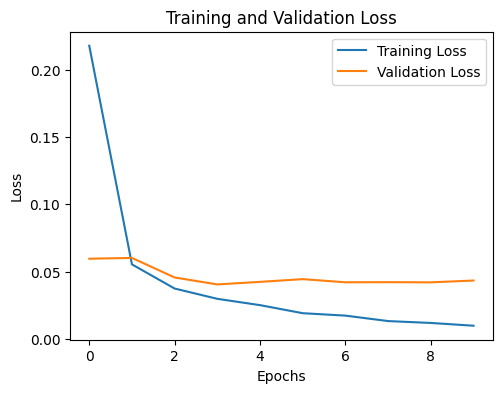

In [11]:
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

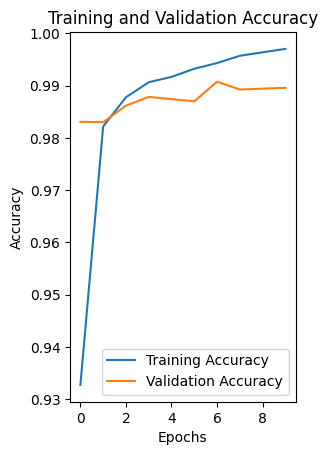

In [12]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

**Step 7: Test the model on a few test images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


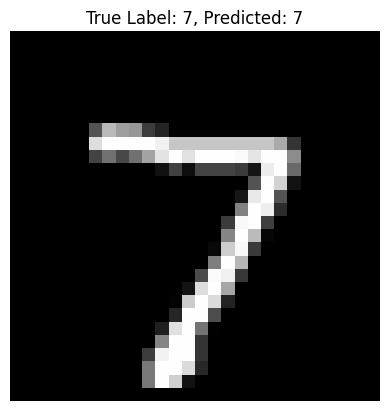

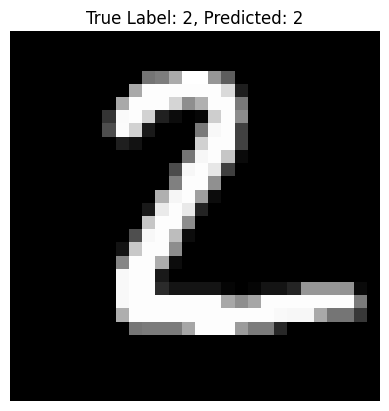

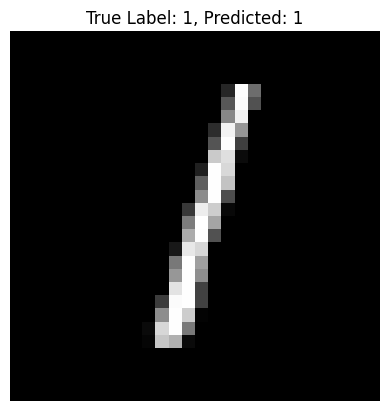

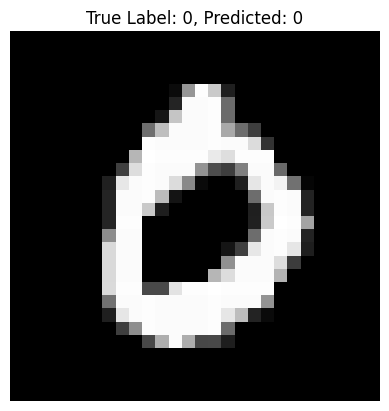

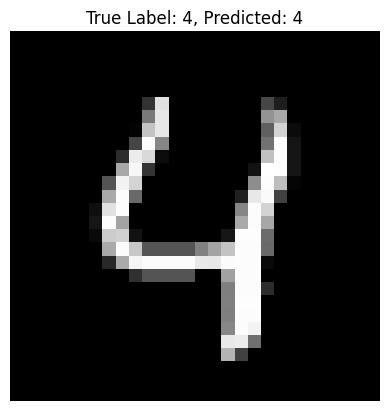

In [15]:
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()